In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_predict
import six
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
def create_heatmap(values_array, title, save_file):
    max_depth = np.arange(1, 11)


    fig, ax = plt.subplots()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(max_depth)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(max_depth)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
    for j in range(len(max_depth)):
        text = ax.text(j, values_array[j],
                       ha="center", va="center", color="w")

    ax.set_title(title)
    ax.set_xlabel("Wartość parametru max_depth")
    fig.tight_layout()
    plt.show()
    fig.savefig("./rysunki/"+save_file )

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc='center')

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [3]:
data = pd.read_csv("./exp_data.csv", sep=',')

categorical_score = {
        'definetely_not': 0,
        'rather_not': 1,
        'undecided': 2,
        'rather_yes': 3,
        'definetely_yes': 4
    }

labels = {
    'music_level': {
        'none': 0,
        'amateur': 1
    },
    'conscienc': categorical_score,
    'calculations': categorical_score,
    'navigation': categorical_score
    
}
data.replace(labels, inplace=True)


le = LabelEncoder()
data['fold_id'] = le.fit_transform(data['id'])
data

,id,sleep_avg,sleep_today,game_years,game_hours,music_level,music_years,languages,sport_years,sport_hours,sport_strength,sport_cardio,sport_intellect,conscienc,calculations,navigation,simil,rmsd,rmsd_norm,time_norm,time,min_parts,max_parts,avg_parts,min_dim,max_dim,avg_dim,fold_id
0,id15923996687907247-1328288358,8,6.5,0,0.0,0,0,2,5,5,42.85714,42.85714,14.28572,3,3,1,81,3.409356,243.288982,153.521127,1.816667,7,7,7.0,1.512087,1.844176,1.678132,0
1,id15923996687907247-1328288358,8,6.5,0,0.0,0,0,2,5,5,42.85714,42.85714,14.28572,3,3,1,43,2.497457,488.467527,668.478261,10.250000,4,6,5.0,1.970921,2.461692,2.216306,0
2,id15923996687907247-1328288358,8,6.5,0,0.0,0,0,2,5,5,42.85714,42.85714,14.28572,3,3,1,7,3.607358,553.255617,192.187500,2.050000,5,7,6.0,1.844176,1.940577,1.892376,0
3,id15923996687907247-1328288358,8,6.5,0,0.0,0,0,2,5,5,42.85714,42.85714,14.28572,3,3,1,50,3.764780,806.069958,100.000000,1.166667,7,8,7.5,1.512087,2.126486,1.819287,0
4,id15923996687907247-1328288358,8,6.5,0,0.0,0,0,2,5,5,42.85714,42.85714,14.28572,3,3,1,60,2.597645,281.556534,107.692308,0.933333,7,8,7.5,1.844176,2.126486,1.985331,0
5,id15924012852675894-1481202890,8,8.0,23,1.0,1,10,2,0,0,30.00000,30.00000,40.00000,4,3,4,26,1.419628,101.303542,233.802817,2.766667,7,7,7.0,1.512087,1.844176,1.678132,1
6,id15924012852675894-1481202890,8,8.0,23,1.0,1,10,2,0,0,30.00000,30.00000,40.00000,4,3,4,5,1.274169,249.209611,135.869565,2.083333,4,6,5.0,1.970921,2.461692,2.216306,1
7,id15924012852675894-1481202890,8,8.0,23,1.0,1,10,2,0,0,30.00000,30.00000,40.00000,4,3,4,37,1.568695,240.588637,100.000000,1.066667,5,7,6.0,1.844176,1.940577,1.892376,1
8,id15924012852675894-1481202890,8,8.0,23,1.0,1,10,2,0,0,30.00000,30.00000,40.00000,4,3,4,76,0.888941,190.329408,151.428571,1.766667,7,8,7.5,1.512087,2.126486,1.819287,1
9,id15924012852675894-1481202890,8,8.0,23,1.0,1,10,2,0,0,30.00000,30.00000,40.00000,4,3,4,89,0.947500,102.698703,167.307692,1.450000,7,8,7.5,1.844176,2.126486,1.985331,1


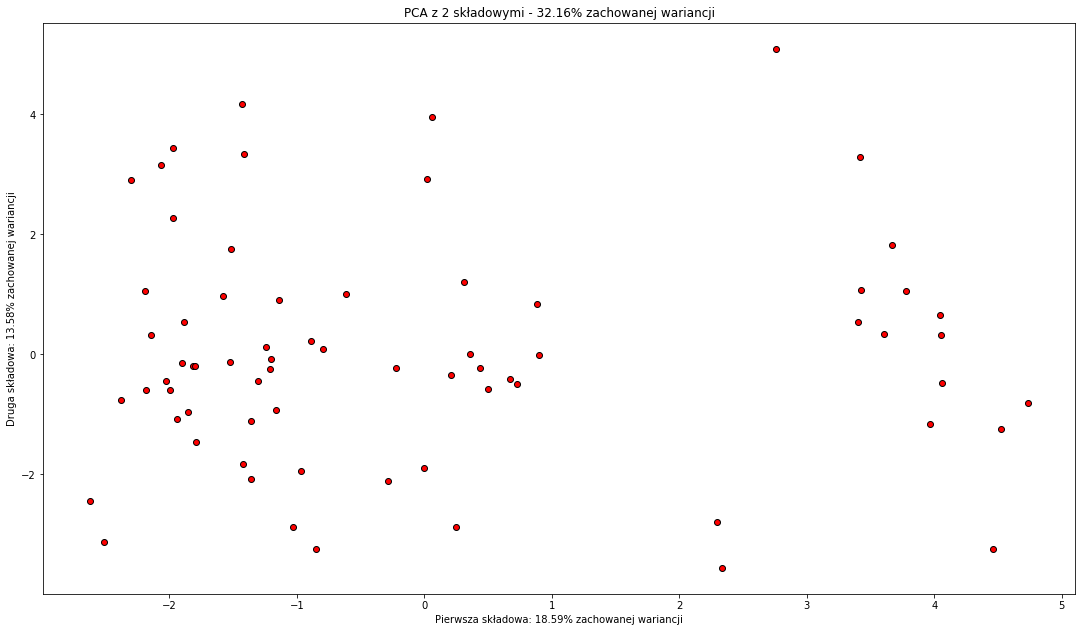

In [4]:
sca = StandardScaler()
data_std = sca.fit_transform(data.iloc[:,1:-1])

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.scatter(X_pca[:,0], X_pca[:,1], color='red', edgecolor='black')

plt.xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("PCA z 2 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.show()
# plt.savefig("./rysunki/PCA_2D.png")
# print(": ", sum(pca.explained_variance_ratio_))

# Model 1

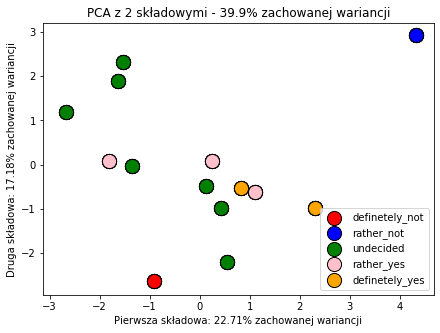

In [5]:
columns  = ['sleep_avg','sleep_today', 'game_years', 'game_hours', 
            'music_level', 'music_years', 'languages', 'sport_years', 
            'sport_hours', 'sport_strength','sport_cardio', 
            'sport_intellect', 'calculations', 'navigation']

# model1_data = data[columns + ['conscienc']].drop_duplicates()[data['conscienc']>1]
model1_data = data[columns + ['id', 'conscienc']]
X = model1_data[columns]
y = model1_data['conscienc']


sca = StandardScaler()
data_std = sca.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(7, 5)
plt.scatter(X_pca[y==0][:,0], X_pca[y==0][:,1], color='red', edgecolor='black', s=200, label='definetely_not')
plt.scatter(X_pca[y==1][:,0], X_pca[y==1][:,1], color='blue', edgecolor='black', s=200, label='rather_not')
plt.scatter(X_pca[y==2][:,0], X_pca[y==2][:,1], color='green', edgecolor='black', s=200, label='undecided')
plt.scatter(X_pca[y==3][:,0], X_pca[y==3][:,1], color='pink', edgecolor='black', s=200, label='rather_yes')
plt.scatter(X_pca[y==4][:,0], X_pca[y==4][:,1], color='orange', edgecolor='black', s=200, label='definetely_yes')


plt.xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("PCA z 2 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))
plt.legend()


plt.savefig("./rysunki/model1_PCA_2D.pdf")
plt.show()
# print(": ", sum(pca.explained_variance_ratio_))

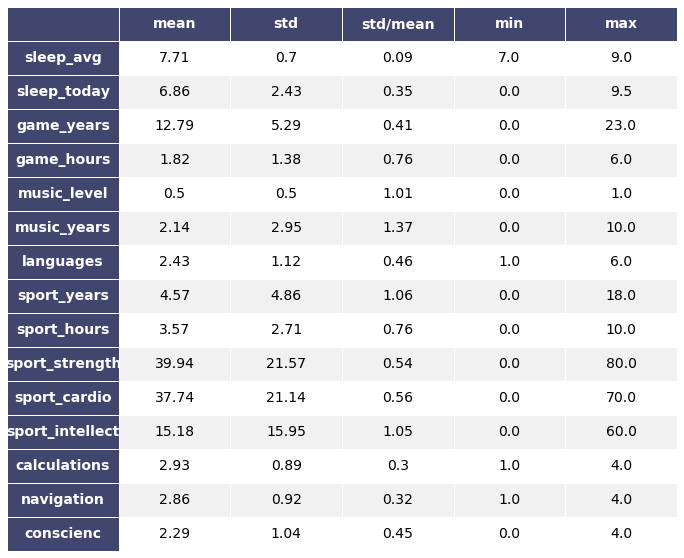

In [23]:
mean_df = pd.DataFrame(model1_data.mean())
std_df = pd.DataFrame(model1_data.std())
min_df = pd.DataFrame(model1_data.min())
max_df = pd.DataFrame(model1_data.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_df["std/mean"] = mean_std_df['0_y']/mean_std_df["0_x"]
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)


mean_std_min_max_df.columns = ['mean', "std", "std/mean", 'min', 'max']
mean_std_min_max_df = pd.DataFrame.round(mean_std_min_max_df,decimals=2)
mean_std_min_max_df = mean_std_min_max_df.reset_index().rename(columns={"index": ""})
mean_std_min_max_df[""] = model1_data.columns
render_mpl_table(mean_std_min_max_df, header_columns=1, col_width=2.0)
plt.savefig("./rysunki/model1_mean_std_min_max.pdf", bbox_inches='tight')
plt.show()

## kNN

Accuracy without StandardScaler:  0.07142857142857142
Accuracy with Normalizer:  0.21428571428571427
Accuracy with StandardScaler:  0.5714285714285714


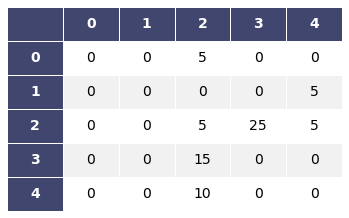

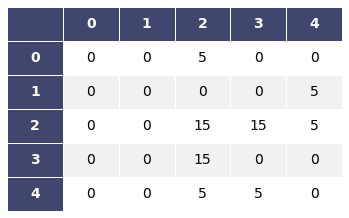

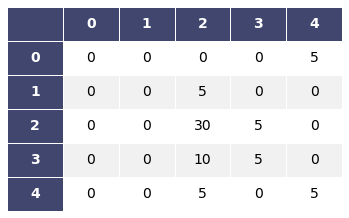

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, PredefinedSplit


model1_data = data[columns + ['conscienc']]
X = model1_data[columns]
y = model1_data['conscienc']

ps = PredefinedSplit(data['fold_id'])


# Bez normalizacji
pipe = Pipeline([('clf', KNeighborsClassifier(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps)
print("Accuracy without StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_knn_confusion_matrix_BEZ_NORM.pdf')


# Normalizer
pipe = Pipeline([('scaler', Normalizer()), ('clf', KNeighborsClassifier(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with Normalizer: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_knn_confusion_matrix_NORM.pdf')


# StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_knn_confusion_matrix_STD.pdf')


## DTC

14
Accuracy without StandardScaler:  0.42857142857142855
Accuracy with Normalizer:  0.42857142857142855
Accuracy with StandardScaler:  0.35714285714285715


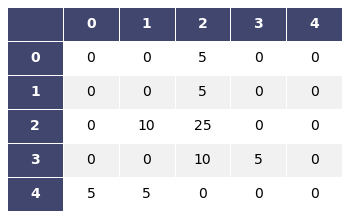

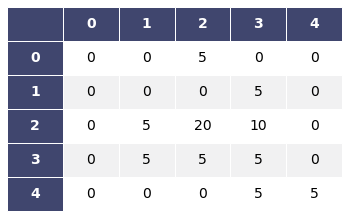

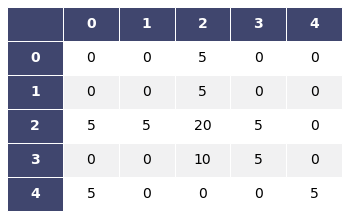

In [259]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, PredefinedSplit

from sklearn.tree import DecisionTreeClassifier


model1_data = data[columns + ['conscienc']]
X = model1_data[columns]
y = model1_data['conscienc']

ps = PredefinedSplit(data['fold_id'])

n_of_samples = len(list_of_ids)
print(n_of_samples)

# Bez normalizacji
pipe = Pipeline([('clf', DecisionTreeClassifier())])
scores = cross_val_score(pipe, X, y, cv=ps)
print("Accuracy without StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_DTC_confusion_matrix_BEZ_NORM.pdf')


# Normalizer
pipe = Pipeline([('scaler', Normalizer()), ('clf', DecisionTreeClassifier())])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with Normalizer: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_DTC_confusion_matrix_NORM.pdf')


# StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('clf',DecisionTreeClassifier())])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_DTC_confusion_matrix_STD.pdf')

## SVC

14
Accuracy without StandardScaler:  0.42857142857142855
Accuracy with Normalizer:  0.42857142857142855
Accuracy with StandardScaler:  0.42857142857142855


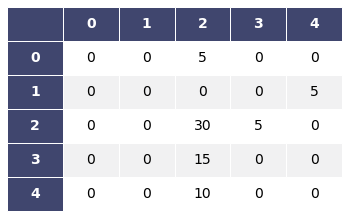

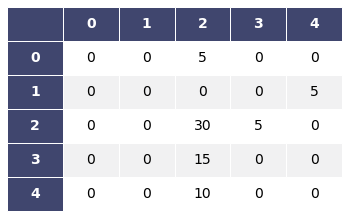

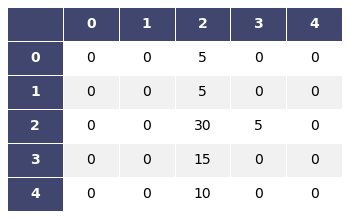

In [266]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, PredefinedSplit

from sklearn.svm import SVC


model1_data = data[columns + ['conscienc']]
X = model1_data[columns]
y = model1_data['conscienc']

ps = PredefinedSplit(data['fold_id'])

n_of_samples = len(list_of_ids)
print(n_of_samples)


# Bez normalizacji
pipe = Pipeline([('clf', SVC())])
scores = cross_val_score(pipe, X, y, cv=ps)
print("Accuracy without StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_SVC_confusion_matrix_BEZ_NORM.pdf')


# Normalizer
pipe = Pipeline([('scaler', Normalizer()), ('clf', SVC())])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with Normalizer: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_SVC_confusion_matrix_NORM.pdf')


# StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('clf',SVC())])
scores = cross_val_score(pipe, X, y, cv=ps)  
print("Accuracy with StandardScaler: ", np.mean(scores))
y_pred = cross_val_predict(pipe, X, y, cv=ps)
conf_mat = confusion_matrix(y, y_pred)

conf_mat_df = pd.DataFrame(data=conf_mat)
conf_mat_df = conf_mat_df.reset_index().rename(columns={"index": ""})
render_mpl_table(conf_mat_df, col_width=1, header_columns=1)
plt.savefig('./rysunki/model1_SVC_confusion_matrix_STD.pdf')

# Model 2

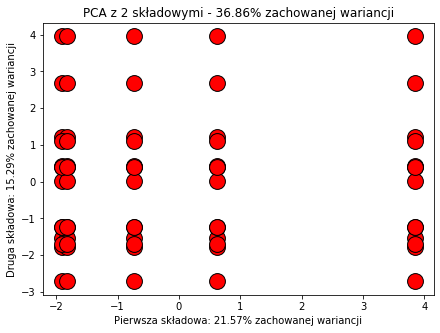

In [25]:
from sklearn.linear_model import LogisticRegression

columns  = ['sleep_avg',
'sleep_today', 'game_years', 'game_hours', 'music_level', 'music_years',
'languages', 'sport_years', 'sport_hours', 'sport_strength',
'sport_cardio', 'sport_intellect', 'conscienc', 'calculations',
'navigation', 'min_parts', 'max_parts', 'avg_parts', 'min_dim',
'max_dim', 'avg_dim']

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']

sca = StandardScaler()
data_std = sca.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(7, 5)
plt.scatter(X_pca[:,0], X_pca[:,1], color='red', edgecolor='black', s=250)



plt.xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("PCA z 2 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.savefig("./rysunki/model2_PCA_2D.pdf")
plt.show()

In [26]:
from matplotlib import interactive
%matplotlib qt  
# wx, gtk, osx, tk, empty uses default

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(12, 9)
ax = plt.axes(projection='3d')

ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], color='red', edgecolor='black')

ax.set_xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel("Trzecia składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[2]*100, 2)))
plt.title("PCA z 3 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

# ax.view_init(10, 0)
# plt.savefig("./rysunki/PCA_3D.svg")
print(": ", sum(pca.explained_variance_ratio_))

:  0.48380900542747907


In [29]:
mean_df = pd.DataFrame(model2_data.mean())
std_df = pd.DataFrame(model2_data.std())
min_df = pd.DataFrame(model2_data.min())
max_df = pd.DataFrame(model2_data.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_df["std/mean"] = mean_std_df['0_y']/mean_std_df["0_x"]
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)

mean_std_min_max_df.columns = ['mean', "std", "std/mean", 'min', 'max']
mean_std_min_max_df = pd.DataFrame.round(mean_std_min_max_df,decimals=2)
mean_std_min_max_df = mean_std_min_max_df.reset_index().rename(columns={"index": ""})
mean_std_min_max_df[""] = model2_data.columns
render_mpl_table(mean_std_min_max_df, header_columns=1, col_width=2.0)
plt.savefig("./rysunki/model2_mean_std_min_max.pdf", bbox_inches='tight')
plt.show()

## LinearRegression

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', LinearRegression())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', LinearRegression())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 20.642412311514054(+/-)8.588218314146836
RMSE with StandardScaler: 22.152411723565994(+/-)9.849369631186054


## SVR

In [294]:
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', SVR())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVR())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 22.20098914006204(+/-)5.115628943914025
RMSE with StandardScaler: 21.746150766916312(+/-)4.994943679670385


## kNN

In [295]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', KNeighborsRegressor(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsRegressor(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 22.645788212141504(+/-)5.201564788679736
RMSE with StandardScaler: 22.514171773866018(+/-)7.074991018247534


## DTR

In [303]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']

max_depth_list = np.arange(1,11)
ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)

without_std = []
with_std = []
for max_depth in max_depth_list:
    print("=================={}=============================".format(max_depth))
    pipe = Pipeline([('clf', DecisionTreeRegressor(max_depth=max_depth))])
    scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
    print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))
    without_std.append(np.mean(scores))

    pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeRegressor(max_depth=max_depth))])
    scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
    print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))
    with_std.append(np.mean(scores))

==================1=============================
RMSE without StandardScaler: 19.503055145939157(+/-)4.902061402415622
RMSE with StandardScaler: 19.503055145939157(+/-)4.902061402415622
==================2=============================
RMSE without StandardScaler: 20.45087050325221(+/-)5.834041897605302
RMSE with StandardScaler: 20.45087050325221(+/-)5.834041897605302
==================3=============================
RMSE without StandardScaler: 22.45568280144773(+/-)8.116109335337345
RMSE with StandardScaler: 21.792000968238117(+/-)8.028442743545035
==================4=============================
RMSE without StandardScaler: 21.831950638374682(+/-)8.300628528962296
RMSE with StandardScaler: 21.619931777474424(+/-)7.573389674447718
==================5=============================
RMSE without StandardScaler: 24.70277024537842(+/-)9.34876155439168
RMSE with StandardScaler: 24.520003541728506(+/-)9.915270596214766
==================6=============================
RMSE without StandardScale

In [359]:
empty = [""]
max_depths = np.arange(1,11)

values = np.array([np.round(with_std, 2)])

fig, ax = plt.subplots()
fig.set_size_inches(7, 1)
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(max_depths)))
ax.set_yticks(np.arange(len(empty)))
# ... and label them with the respective list entries
ax.set_xticklabels(max_depths)
ax.set_yticklabels(empty)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(empty)):
    for j in range(len(max_depths)):
        text = ax.text(j, i, values[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("./rysunki/model2_DTR_heatmap_BEZ_NORM.pdf")
plt.show()

In [360]:
empty = [""]
max_depths = np.arange(1,11)

values = np.array([np.round(without_std, 2)])

fig, ax = plt.subplots()
fig.set_size_inches(7, 1)
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(max_depths)))
ax.set_yticks(np.arange(len(empty)))
# ... and label them with the respective list entries
ax.set_xticklabels(max_depths)
ax.set_yticklabels(empty)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(empty)):
    for j in range(len(max_depths)):
        text = ax.text(j, i, values[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("./rysunki/model2_DTR_heatmap_STD.pdf")
plt.show()

## MLPRegressor

In [296]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error

model2_data = data[columns + ['simil']]
X = model2_data[columns]
y = model2_data['simil']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', MLPRegressor(hidden_layer_sizes=(10,5)))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', MLPRegressor(hidden_layer_sizes=(10,5), max_iter=50000))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

RMSE without StandardScaler: 24.141201389781024(+/-)10.130288792721883


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSE with StandardScaler: 40.66751685960996(+/-)26.58045047217007


In [195]:
X_std = StandardScaler().fit_transform(X)
r = pipe['clf'].fit(X_std, y).predict(X_std)
pd.DataFrame({'Actual': y, 'Predicted': r})

,Actual,Predicted
0,81,53.6
1,43,37.6
2,7,48.2
3,50,46.6
4,60,44.6
5,26,58.4
6,5,50.2
7,37,46.6
8,76,58.6
9,89,58.0


In [198]:
model3_data

,min_parts,max_parts,avg_parts,min_dim,max_dim,avg_dim,rmsd
0,7,7,7.0,1.512087,1.844176,1.678132,3.409356
1,4,6,5.0,1.970921,2.461692,2.216306,2.497457
2,5,7,6.0,1.844176,1.940577,1.892376,3.607358
3,7,8,7.5,1.512087,2.126486,1.819287,3.764780
4,7,8,7.5,1.844176,2.126486,1.985331,2.597645
5,7,7,7.0,1.512087,1.844176,1.678132,1.419628
6,4,6,5.0,1.970921,2.461692,2.216306,1.274169
7,5,7,6.0,1.844176,1.940577,1.892376,1.568695
8,7,8,7.5,1.512087,2.126486,1.819287,0.888941
9,7,8,7.5,1.844176,2.126486,1.985331,0.947500


# Model 3

In [30]:
columns  = ['min_parts', 'max_parts', 'avg_parts', 'min_dim', 'max_dim', 'avg_dim']

model3_data = data[columns + ['rmsd']]
X = model3_data[columns]
y = model3_data['rmsd']

sca = StandardScaler()
data_std = sca.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(7, 5)
plt.scatter(X_pca[:,0], X_pca[:,1], color='red', edgecolor='black', s=250)



plt.xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title("PCA z 2 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.savefig("./rysunki/model3_PCA_2D.pdf")
plt.show()

In [373]:
from matplotlib import interactive
%matplotlib qt  
# wx, gtk, osx, tk, empty uses default

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(data_std)

fig = plt.figure()
fig.set_size_inches(12, 9)
ax = plt.axes(projection='3d')

ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], color='red', edgecolor='black')

ax.set_xlabel("Pierwsza składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel("Druga składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel("Trzecia składowa: {0}% zachowanej wariancji".format(round(pca.explained_variance_ratio_[2]*100, 2)))
plt.title("PCA z 3 składowymi - {0}% zachowanej wariancji".format(round(sum(pca.explained_variance_ratio_)*100, 2)))

# ax.view_init(10, 0)
# plt.savefig("./rysunki/PCA_3D.svg")
print(": ", sum(pca.explained_variance_ratio_))

:  0.9860868608373192


In [31]:
mean_df = pd.DataFrame(model3_data.mean())
std_df = pd.DataFrame(model3_data.std())
min_df = pd.DataFrame(model3_data.min())
max_df = pd.DataFrame(model3_data.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_df["std/mean"] = mean_std_df['0_y']/mean_std_df["0_x"]
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)

mean_std_min_max_df.columns = ['mean', "std", "std/mean", 'min', 'max']
mean_std_min_max_df = pd.DataFrame.round(mean_std_min_max_df,decimals=2)
mean_std_min_max_df = mean_std_min_max_df.reset_index().rename(columns={"index": ""})
mean_std_min_max_df[""] = model3_data.columns
render_mpl_table(mean_std_min_max_df, header_columns=1, col_width=2.0)
plt.savefig("./rysunki/model3_mean_std_min_max.pdf", bbox_inches='tight')
plt.show()

## LinearRegression

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

model3_data = data[columns + ['rmsd']]
X = model3_data[columns]
y = model3_data['rmsd']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', LinearRegression())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', LinearRegression())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 0.4911088778429883(+/-)0.4660399612761264
RMSE with StandardScaler: 0.4911088778429883(+/-)0.4660399612761263


## SVR

In [368]:
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

model3_data = data[columns + ['rmsd']]
X = model3_data[columns]
y = model3_data['rmsd']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', SVR())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVR())])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 0.4270604345211435(+/-)0.5284817200885757
RMSE with StandardScaler: 0.40775383742710775(+/-)0.5172886865193045


## kNN

In [369]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error

model3_data = data[columns + ['rmsd']]
X = model3_data[columns]
y = model3_data['rmsd']


ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)
pipe = Pipeline([('clf', KNeighborsRegressor(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))


pipe = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsRegressor(n_neighbors=5))])
scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))

RMSE without StandardScaler: 0.6594521123724203(+/-)0.4033115128659261
RMSE with StandardScaler: 0.6724186655957202(+/-)0.3967669188204267


## DTR

In [377]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

model3_data = data[columns + ['rmsd']]
X = model3_data[columns]
y = model3_data['rmsd']

max_depth_list = np.arange(1,11)
ps = PredefinedSplit(data['fold_id'])
scorer = make_scorer(mean_squared_error, squared=False)

without_std = []
with_std = []
for max_depth in max_depth_list:
    print("=================={}=============================".format(max_depth))
    pipe = Pipeline([('clf', DecisionTreeRegressor(max_depth=max_depth))])
    scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)
    print("RMSE without StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))
    without_std.append(np.mean(scores))

    pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeRegressor(max_depth=max_depth))])
    scores = cross_val_score(pipe, X, y, cv=ps, scoring=scorer)  
    print("RMSE with StandardScaler: {}(+/-){}".format(np.mean(scores), np.std(scores)))
    with_std.append(np.mean(scores))

==================1=============================
RMSE without StandardScaler: 0.5327493864547715(+/-)0.45886917209417266
RMSE with StandardScaler: 0.5327493864547715(+/-)0.4588691720941728
==================2=============================
RMSE without StandardScaler: 0.48861603341315885(+/-)0.4670790366586408
RMSE with StandardScaler: 0.4886160334131589(+/-)0.4670790366586409
==================3=============================
RMSE without StandardScaler: 0.4907177248450984(+/-)0.4648838725265994
RMSE with StandardScaler: 0.4907177248450984(+/-)0.4648838725265994
==================4=============================
RMSE without StandardScaler: 0.4911088778429883(+/-)0.4660399612761263
RMSE with StandardScaler: 0.4911088778429882(+/-)0.4660399612761263
==================5=============================
RMSE without StandardScaler: 0.49110887784298823(+/-)0.4660399612761263
RMSE with StandardScaler: 0.4911088778429883(+/-)0.4660399612761261
==================6=============================
RMSE wit

In [380]:
empty = [""]
max_depths = np.arange(1,11)

values = np.array([np.round(with_std, 2)])

fig, ax = plt.subplots()
fig.set_size_inches(7, 1)
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(max_depths)))
ax.set_yticks(np.arange(len(empty)))
# ... and label them with the respective list entries
ax.set_xticklabels(max_depths)
ax.set_yticklabels(empty)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(empty)):
    for j in range(len(max_depths)):
        text = ax.text(j, i, values[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("./rysunki/model3_DTR_heatmap_BEZ_NORM.pdf")
plt.show()

In [379]:
empty = [""]
max_depths = np.arange(1,11)

values = np.array([np.round(without_std, 2)])

fig, ax = plt.subplots()
fig.set_size_inches(7, 1)
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(max_depths)))
ax.set_yticks(np.arange(len(empty)))
# ... and label them with the respective list entries
ax.set_xticklabels(max_depths)
ax.set_yticklabels(empty)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(empty)):
    for j in range(len(max_depths)):
        text = ax.text(j, i, values[i, j],
                       ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("./rysunki/model3_DTR_heatmap_STD.pdf")
plt.show()

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import make_scorer, accuracy_score

names  = ['sleep_avg','sleep_today', 'game_years', 'game_hours', 
            'music_level', 'music_years', 'languages', 'sport_years', 
            'sport_hours', 'sport_strength','sport_cardio', 
            'sport_intellect', 'calculations', 'navigation']

#TODO przeczytaj dokumentację
clf = pipe.fit(X, y)
sfs = SFS(clf, k_features=len(names), forward=True, floating=False,
scoring=(make_scorer(accuracy_score)), cv=ps) #SELECTED_ATTRS: liczba wszystkich atrybutów, jakie były w tym zadaniu
sfs = sfs.fit(X, y)
previous_set=set()
for s in sfs.subsets_: # wyswietla sliczny trojkat z kolejnymi atrybutami i jaką sumarycznie uzyskują jakość.
    attrs=sfs.subsets_[s]['feature_idx']
    print("%.5f"%sfs.subsets_[s]['avg_score'], attrs, end=' # ')
    diff=set(attrs)-previous_set
    for a in diff: #powinien byc tylko jeden w roznicy zbiorow, ale na wszelki wypadek petla
        print(names[a], end=' ')
    print()
    previous_set=set(attrs)

0.64286 (12,) # calculations 
0.71429 (12, 13) # navigation 
0.78571 (3, 12, 13) # game_hours 
0.78571 (3, 4, 12, 13) # music_level 
0.78571 (0, 3, 4, 12, 13) # sleep_avg 
0.78571 (0, 1, 3, 4, 12, 13) # sleep_today 
0.78571 (0, 1, 2, 3, 4, 12, 13) # game_years 
0.78571 (0, 1, 2, 3, 4, 11, 12, 13) # sport_intellect 
0.78571 (0, 1, 2, 3, 4, 6, 11, 12, 13) # languages 
0.71429 (0, 1, 2, 3, 4, 6, 7, 11, 12, 13) # sport_years 
0.64286 (0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 13) # sport_hours 
0.64286 (0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13) # music_years 
0.64286 (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13) # sport_cardio 
0.57143 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) # sport_strength 


array([0, 1, 2, 3, 4, 5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
all_points_on_line:  [(0, 3.0), (1, 4.0), (2, 5.0), (3, 6.0), (4, 7.0), (5, 8.0)]
all_points_on_line:  [(0, 6.0), (1, 6.0), (2, 6.0), (3, 6.0), (4, 6.0), (5, 6.0)]
[[0. 0. 0. 1. 1. 1. 6. 1. 1.]
 [0. 1. 1. 6. 1. 1. 1. 0. 0.]
 [1. 1. 2. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 2. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0.]]


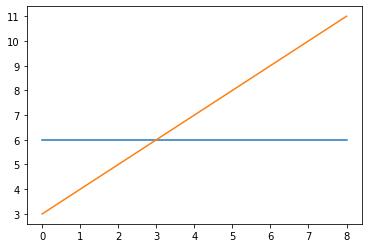

In [10]:
import numpy as np 
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
a_lower = 0
a_upper = 5
b_lower = 0
b_upper = 8

all_possible_a = np.arange(a_lower, a_upper+1)
all_possible_b = np.arange(b_lower, b_upper+1)

x = [[0, 5], [0, 5]] # wartości x wszystkich punktów dla wszystkich linii
y = [[3, 8], [6, 6]] # odpowiadające wartości y wszystkich punktów tych linii


acc_matrix = np.zeros((a_upper+1, b_upper+1)) # acc_matrix[a,b]
print(acc_matrix)

done_points = []
for line in zip(x,y):
    x_list, y_list = line
    f = interp1d(x_list, y_list)
    
    all_points_on_line = []
    for x in range(x_list[0], x_list[1]+1):
        all_points_on_line.append((x, f(x).tolist()))
    
    print("all_points_on_line: ", all_points_on_line)
    
    for point in all_points_on_line:
        if point in done_points:
            continue
        done_points.append(point)
        
        x, y = point
        for a in all_possible_a:
            b = y-a*x
            if b in all_possible_b:
#                 print("a, b: ", a, b)
                acc_matrix[int(a),int(b)]+=1
    
print(acc_matrix)

###### wykres PROSTYCH #######
max_value = np.max(acc_matrix)
result = np.where(acc_matrix == max_value)
indexes_of_max_values = list(zip(result[0], result[1]))

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, max(a_upper,b_upper), max(a_upper,b_upper))
for i, temp in enumerate(indexes_of_max_values):
    a, b = indexes_of_max_values[i]
    ax.plot(x, (a*x+b))

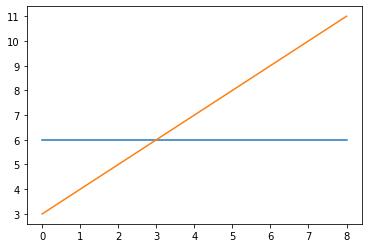

In [9]:
max_value = np.max(acc_matrix)
result = np.where(acc_matrix == max_value)
indexes_of_max_values = list(zip(result[0], result[1]))

fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, max(a_upper,b_upper), max(a_upper,b_upper))
for i, temp in enumerate(indexes_of_max_values):
    a, b = indexes_of_max_values[i]
    ax.plot(x, (a*x+b))
    
# a1, b1 = indexes_of_max_values[0]
# a2, b2 = indexes_of_max_values[1]
# ax.plot(x, (a1*x+b1))
# ax.plot(x, (a2*x+b2))

In [7]:
max(5, 4)

5

In [78]:
f

3.0
4.0
5.0
6.0
7.0
8.0
